In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_df = pd.read_csv ("data/mouse_drug_data.csv")
clinical_df = pd.read_csv ("data/clinicaltrial_data.csv")



# Combine the data into a single dataset

mouse_clinical_merged = pd.merge(clinical_df, mouse_df,how="left", on= "Mouse ID")

# Display the data table for preview
mouse_clinical_merged.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [2]:
mouse_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [3]:
clinical_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
MeanDF = mouse_clinical_merged.groupby(["Drug","Timepoint"])


TumorDF = MeanDF["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
Grouped_mean = pd.DataFrame (TumorDF)


# Preview DataFrame

Grouped_mean.head()



Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [5]:
Grouped_mean.tail()

Grouped_mean = Grouped_mean.reset_index()

type(Grouped_mean)
Grouped_mean.columns

Index(['Drug', 'Timepoint', 'Tumor Volume (mm3)'], dtype='object')

In [6]:
Grouped_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [7]:
# # Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

TumorDF = MeanDF["Tumor Volume (mm3)"].sem()

# Convert to DataFrame

TumorSemDF = pd.DataFrame (TumorDF)
TumorSemDF = TumorSemDF.reset_index() 

TumorSemDF.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [8]:
TumorDF_format = TumorDF.unstack("Drug")
TumorDF_format.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [9]:
Grouped_mean_pivot = Grouped_mean.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]


In [10]:
Grouped_mean_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [11]:
TumorSemDF_pivot = TumorSemDF.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]



In [12]:
TumorSemDF_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [13]:
MeanDF_format= Grouped_mean.unstack("Drug")
MeanDF_format.head()

Drug  0    Capomulin
      1    Capomulin
      2    Capomulin
      3    Capomulin
      4    Capomulin
dtype: object

In [14]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
Drug_df = Grouped_mean.unstack("Drug")
#Drug_df = Grouped_mean.sort_values ()
Drug_df

Drug                0     Capomulin
                    1     Capomulin
                    2     Capomulin
                    3     Capomulin
                    4     Capomulin
                    5     Capomulin
                    6     Capomulin
                    7     Capomulin
                    8     Capomulin
                    9     Capomulin
                    10     Ceftamin
                    11     Ceftamin
                    12     Ceftamin
                    13     Ceftamin
                    14     Ceftamin
                    15     Ceftamin
                    16     Ceftamin
                    17     Ceftamin
                    18     Ceftamin
                    19     Ceftamin
                    20    Infubinol
                    21    Infubinol
                    22    Infubinol
                    23    Infubinol
                    24    Infubinol
                    25    Infubinol
                    26    Infubinol
                    27    In

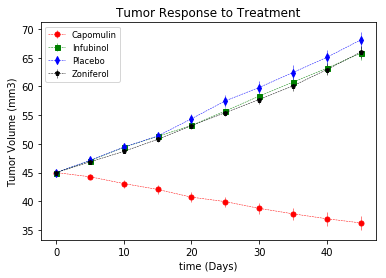

In [15]:
# Generate the Plot (with Error Bars)



plt.errorbar(Grouped_mean_pivot.index, Grouped_mean_pivot["Capomulin"]\
             , yerr=TumorSemDF_pivot["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)

plt.errorbar(Grouped_mean_pivot.index, Grouped_mean_pivot["Infubinol"]\
             , yerr=TumorSemDF_pivot["Infubinol"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(Grouped_mean_pivot.index, Grouped_mean_pivot["Placebo"]\
             , yerr=TumorSemDF_pivot["Placebo"], color="b", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(Grouped_mean_pivot.index, Grouped_mean_pivot["Zoniferol"]\
             , yerr=TumorSemDF_pivot["Zoniferol"], color="k", marker="p", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Tumor Response to Treatment")
plt.xlabel("time (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.legend(loc="best", fontsize="small", fancybox=True)

#Drug_df = MeanDF_format.unstack ("drug").plot()
#Drug_df = Grouped_mean.unstack ("Drug").plot()

#Drug_df

#formula I brought over from Stackflow
#plt.errorbar(trip.index, trip['gas'], yerr=trip['std'])

# Save the Figure



In [16]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [17]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

MetMeanDF = mouse_clinical_merged.groupby(["Drug","Timepoint"])


MetTumorDF = MetMeanDF["Metastatic Sites"].mean()

# Convert to DataFrame
MetGrouped_mean = pd.DataFrame (MetTumorDF)
MetGrouped_mean = MetGrouped_mean.reset_index()

# Preview DataFrame

MetGrouped_mean.head()






,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [18]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
MetTumorDF = MetMeanDF["Metastatic Sites"].sem()

# Convert to DataFrame

MetTumorSemDF = pd.DataFrame (MetTumorDF)
MetTumorSemDF = MetTumorSemDF.reset_index() 


# Preview DataFrame
MetTumorSemDF.head()





,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [19]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked

MetGrouped_mean_pivot = MetGrouped_mean.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]



In [20]:
MetGrouped_mean_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [21]:
MetTumorSemDF_pivot = MetTumorSemDF.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

In [22]:
MetTumorSemDF_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


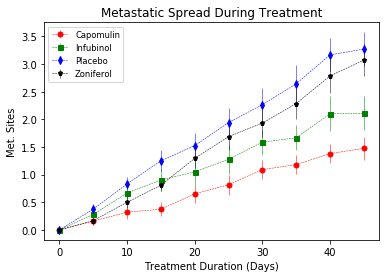

In [23]:
# Generate the Plot (with Error Bars)
plt.errorbar(MetGrouped_mean_pivot.index, MetGrouped_mean_pivot["Capomulin"]\
             , yerr=MetTumorSemDF_pivot["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)

plt.errorbar(MetGrouped_mean_pivot.index, MetGrouped_mean_pivot["Infubinol"]\
             , yerr=MetTumorSemDF_pivot["Infubinol"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(MetGrouped_mean_pivot.index, MetGrouped_mean_pivot["Placebo"]\
             , yerr=MetTumorSemDF_pivot["Placebo"], color="b", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(MetGrouped_mean_pivot.index, MetGrouped_mean_pivot["Zoniferol"]\
             , yerr=MetTumorSemDF_pivot["Zoniferol"], color="k", marker="p", markersize=5, linestyle="dashed", linewidth=0.50)


plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")

plt.legend(loc="best", fontsize="small", fancybox=True)
# Save the Figure

# Show the Figure


## Survival Rates

In [24]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
SRMeanDF = mouse_clinical_merged.groupby(["Drug","Timepoint"])


SRTumorDF= SRMeanDF["Mouse ID"].count()

#SRTumorDF = SRTumorDF.rename(columns = {"Mouse ID": "Mouse Count"})

# Convert to DataFrame
SRGrouped_mean= pd.DataFrame (SRTumorDF)
#SRGrouped_mean.drop("Mouse ID", axis=3)

SRGrouped_mean = SRGrouped_mean.reset_index()

SRGrouped_mean.columns = ['Drug', 'Timepoint', 'Mouse Count'] 

SRGrouped_mean.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [25]:
# Minor Data Munging to Re-Format the Data Frames

SRGrouped_mean_pivot = SRGrouped_mean.pivot(index="Timepoint", columns="Drug")["Mouse Count"]


In [26]:
SRGrouped_mean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [27]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
SRMeanDF = mouse_clinical_merged.groupby(["Drug","Timepoint"])
SRTumorDF = SRMeanDF["Mouse ID"].count()

# Convert to DataFrame

SRTumorSemDF = pd.DataFrame (SRTumorDF)
SRTumorSemDF = SRTumorSemDF.reset_index() 

SRTumorSemDF.columns = ['Drug', 'Timepoint', 'Mouse Count'] 

# Preview DataFrame
SRTumorSemDF.head()

#----------------------------------
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# SRMeanDF = mouse_clinical_merged.groupby(["Drug","Timepoint"])


# SRTumorDF= SRMeanDF["Mouse ID"].count()

# #SRTumorDF = SRTumorDF.rename(columns = {"Mouse ID": "Mouse Count"})

# # Convert to DataFrame
# SRGrouped_mean= pd.DataFrame (SRTumorDF)
# #SRGrouped_mean.drop("Mouse ID", axis=3)

# SRGrouped_mean = SRGrouped_mean.reset_index()

# SRGrouped_mean.columns = ['Drug', 'Timepoint', 'Mouse Count'] 

# SRGrouped_mean.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [28]:
SRTumorSemDF_pivot = SRTumorSemDF.pivot(index="Timepoint", columns="Drug")["Mouse Count"]

In [29]:
SRTumorSemDF_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


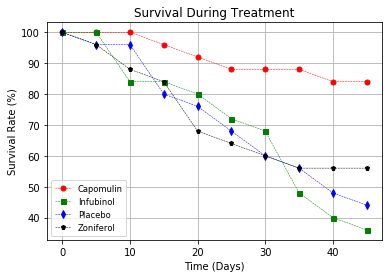

In [30]:
plt.plot(SRGrouped_mean_pivot.index, SRTumorSemDF_pivot["Capomulin"]/25*100\
             , color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)

plt.plot(SRGrouped_mean_pivot.index, SRTumorSemDF_pivot["Infubinol"]/25*100\
              , color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.plot(SRGrouped_mean_pivot.index, SRTumorSemDF_pivot["Placebo"]/25*100\
              , color="b", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)
plt.plot(SRGrouped_mean_pivot.index, SRTumorSemDF_pivot["Zoniferol"]/25*100\

            , color="k", marker="p", markersize=5, linestyle="dashed", linewidth=0.50)


plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

plt.grid()
plt.legend(loc="best", fontsize="small", fancybox=True)

In [31]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [48]:
# Calculate the percent changes for each drug

DrugDict = ["Capomulin","Infubinol","Placebo","Zoniferol"]

DrugDict1 = (-19.475303),(46.123472),(51.297960),(46.579751)
Change = [int(y) for x,y in DrugDict1 if x in DrugDict]



Chart = plt.bar(DrugDict, DrugDict1, color= ["r", "g","y", "b"])


# Splice the data between passing and failing drugs

# plt.bar = DrugDict, DrugDict1=color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)


# # Display the data to confirm


TypeError: cannot unpack non-iterable float object

In [ ]:
# Store all Relevant Percent Changes into a Tuple
DrugDict1 = ((Capomulin, -19.475303 )(Ceftamin, 42.516492)(Infubinol,46.123472)(Ketapril,57.028795)\
(Naftisol,53.923347),(Placebo,51.297960),(Propriva,47.241175),(Ramicane, -22.320900)\
(Stelasyn,52.085134),(Zoniferol,46.579751))
# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

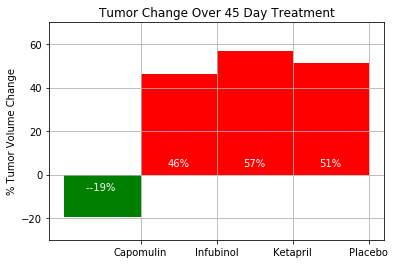